_Lambda School Data Science Unit 2_
 
 # Sprint Challenge: Practicing & Understanding Predictive Modeling

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [1]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) **Use cross-validation** to **do hyperparameter optimization**, and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._

# Project Start

Step 1 is to establish a naive baselin to judge our model against.

In [5]:
# train['Fail'].value_counts(normalize=True0)
test['Fail'].value_counts(normalize=True)

0    0.741419
1    0.258581
Name: Fail, dtype: float64

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import 


In [13]:
train.columns.tolist()

['Inspection ID',
 'DBA Name',
 'AKA Name',
 'License #',
 'Facility Type',
 'Risk',
 'Address',
 'City',
 'State',
 'Zip',
 'Inspection Date',
 'Inspection Type',
 'Violations',
 'Latitude',
 'Longitude',
 'Location',
 'Fail']

In [12]:
train[train['Violations'].isna()]['Fail'].value_counts(normalize=True)
# leaky variable

0    0.885655
1    0.114345
Name: Fail, dtype: float64

'Inspection ID', - arbitraty id drop
 'DBA Name', - arbitraty id drop
 'AKA Name', - arbitraty id drop
 'License #', - arbitraty id drop
 'Facility Type' -category
 'Risk', - ordinal 
 'Address' - drop
 'City', - drop
 'State' - drop
 'Zip', - drop
 'Inspection Date', -?
 'Inspection Type', -?
 'Violations', -leaky, drop
 'Latitude', -use for grouping
 'Longitude' -use for grouping
 'Location' - drop, use lat/long
 'Fail' - target

In [21]:
train.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [23]:
train[train['Fail']==1]['Inspection Type'].value_counts(normalize=True)

canvass                                   0.466483
license                                   0.237003
complaint                                 0.158722
canvass re-inspection                     0.034560
license re-inspection                     0.028750
short form complaint                      0.024579
complaint re-inspection                   0.017354
license-task force                        0.009757
suspected food poisoning                  0.005512
out of business                           0.003501
consultation                              0.003277
task force liquor 1475                    0.003277
complaint-fire                            0.001341
no entry                                  0.000894
recent inspection                         0.000819
short form fire-complaint                 0.000819
tag removal                               0.000596
package liquor 1474                       0.000521
special events (festivals)                0.000447
pre-license consultation       

In [24]:
train[train['Fail']==0]['Inspection Type'].value_counts(normalize=True)

canvass                                   0.465250
canvass re-inspection                     0.152823
license                                   0.120658
complaint                                 0.073190
license re-inspection                     0.067967
complaint re-inspection                   0.052171
short form complaint                      0.046065
consultation                              0.003767
tag removal                               0.003585
suspected food poisoning                  0.003456
license-task force                        0.002156
out of business                           0.001663
recent inspection                         0.001429
suspected food poisoning re-inspection    0.001429
task force liquor 1475                    0.001247
complaint-fire                            0.000857
short form fire-complaint                 0.000650
special events (festivals)                0.000390
complaint-fire re-inspection              0.000338
no entry                       

no significant difference, just keep it in

In [40]:
drop_features = ['Inspection ID',
                 'License #',
                 'Address',
                 'City',
                 'State',
                 'Zip',
                 'Location',
                 'Violations',
 'DBA Name',
 'AKA Name',
  'Fail']

In [41]:
train['Inspection Type'] = train['Inspection Type'].str.lower()
test['Inspection Type'] = test['Inspection Type'].str.lower() #.value_counts(normalize=True)

In [42]:
X_train = train.drop(columns = drop_features)
y_train = train['Fail']

X_test = test.drop(columns = drop_features)
y_test = test['Fail']

In [61]:
X_train[['Inspection Y', 'Inspection M', 'Inspection D']] = X_train['Inspection Date'].str.split(pat='-',expand=True)
X_train[['Inspection D', 'Time']] = X_train['Inspection D'].str.split(pat='T', expand=True)#replace('T00:00:00','')
X_train = X_train.drop(columns=['Time', 'Inspection Date'])

In [66]:
X_test[['Inspection Y', 'Inspection M', 'Inspection D']] = X_test['Inspection Date'].str.split(pat='-',expand=True)
X_test[['Inspection D', 'Time']] = X_test['Inspection D'].str.split(pat='T', expand=True)#replace('T00:00:00','')
X_test = X_test.drop(columns=['Time', 'Inspection Date'])

In [67]:
X_train.dtypes

Facility Type       object
Risk                object
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Inspection Y        object
Inspection M        object
Inspection D        object
dtype: object

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) **Use cross-validation** to **do hyperparameter optimization**, and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint
import numpy as np
from sklearn.metrics import roc_auc_score

In [98]:
# set randseed for our tests
rseed = 314

In [99]:
X_train.shape, y_train.shape

((51916, 10), (51916,))

In [104]:
#pre-process with simple imputer and binary encoder
pipe = make_pipeline(
    ce.BinaryEncoder(),
    SimpleImputer(),
    XGBClassifier(n_jobs=-1, random_state=rseed)
)

param_distributions = {
    'xgbclassifier__n_estimators': randint(90,150),
    'xgbclassifier__max_depth': randint(2,5),
#     'xgbclassifier__learning_rate': randint(0.01,0.1),
    'xgbclassifier__tree_method': ['gpu_exact','gpu_hist']
}

search = RandomizedSearchCV(
    estimator = pipe,
    param_distributions = param_distributions,
    n_iter=20,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=10,
    return_train_score=True,
)


search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.5s
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('binaryencoder', BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
       handle_unknown='value', mapping=None, return_df=True, verbose=0)), ('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('xgbclassifi...te=314, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f621c312a20>, 'xgbclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f621c312080>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [107]:
pd.DataFrame(search.cv_results_).sort_values('mean_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_depth,param_xgbclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,3.184808,0.101729,0.149824,0.014525,2,104,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.688255,0.697501,0.694169,0.693308,0.003823,20,0.716041,0.700978,0.697285,0.704768,0.008113
1,3.214859,0.086225,0.139061,0.002476,2,107,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.688746,0.697033,0.695612,0.693797,0.003619,19,0.716378,0.701689,0.698399,0.705488,0.007816
19,3.305018,0.116348,0.141405,0.013303,2,112,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.688737,0.697654,0.696741,0.694378,0.004006,18,0.716902,0.702656,0.700352,0.706637,0.007320
3,3.531192,0.129936,0.158544,0.017738,2,116,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...",0.689578,0.698244,0.696861,0.694894,0.003801,17,0.717349,0.703565,0.701616,0.707510,0.007003
18,3.994037,0.050463,0.181563,0.015163,3,94,"{'xgbclassifier__max_depth': 3, 'xgbclassifier...",0.697350,0.704861,0.701165,0.701125,0.003066,16,0.732974,0.720615,0.722440,0.725343,0.005447


In [ ]:
best=search.best_estimator_

# process x_test
encoder = ce.BinaryEncoder()
X_test = encoder.fit_transform(X_test)
X_test = SimpleImputer().fit_transform(X_test)

In [114]:
X_test.shape, X_train.shape

((17306, 52), (51916, 10))

In [112]:
y_test_pred_proba = best.predict_proba(X_test)[:,1]

print('ROC_AUC  held out test score: ', roc_auc_score(y_test, y_test_pred_proba))

ValueError: Unexpected input dimension 52, expected 10

In [262]:


param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.5, 0.8],
    'learning_rate': [0.01, 0.05, 0.01]
}

search = RandomizedSearchCV(
    estimator = XGBClassifier(n_jobs=-1, random_state=randseed),
    param_distributions = param_distributions,
    n_iter=20,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=10,
    return_train_score=True,
    random_state=randseed
)

search.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=314, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 4, 5, 6], 'subsample': [0.5, 0.8], 'learning_rate': [0.01, 0.05, 0.01]},
          pre_dispatch='2*n_jobs', random_state=314, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [264]:
#best 5 candidates
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,6.324692,0.097424,0.240695,0.018913,0.8,200,6,0.05,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.700074,0.699630,0.708773,0.702825,0.004209,1,0.732972,0.734679,0.729427,0.732359,0.002187
7,12.695952,0.709056,0.507854,0.035996,0.8,500,5,0.05,"{'subsample': 0.8, 'n_estimators': 500, 'max_d...",0.700647,0.698500,0.708653,0.702600,0.004369,2,0.736192,0.736955,0.732775,0.735308,0.001818
15,4.033292,0.038154,0.135776,0.001327,0.8,200,4,0.05,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.696219,0.696900,0.702560,0.698559,0.002842,3,0.712184,0.713737,0.709215,0.711712,0.001876
5,16.402098,0.694684,0.515263,0.050309,0.5,500,5,0.01,"{'subsample': 0.5, 'n_estimators': 500, 'max_d...",0.695172,0.696160,0.702986,0.698106,0.003474,4,0.713062,0.714199,0.709704,0.712321,0.001908
16,13.237910,0.286527,0.481347,0.038326,0.8,500,5,0.01,"{'subsample': 0.8, 'n_estimators': 500, 'max_d...",0.693793,0.695796,0.701895,0.697161,0.003446,5,0.711333,0.713568,0.708876,0.711259,0.001916


## Test Results against Held Out Test Set

In [268]:
def test_wrangle(df):
    #change all fit_transform to transform 
    
    X = df.copy()
    X = X.drop(columns=['DBA Name', 'AKA Name', 'Inspection Date', 'Inspection ID',
                        #'Inspection Type',
                        'License #', 'City', 'State', 'Address',
                       'Violations', 
                        'Latitude', 'Longitude', 'Location'])
    
    #ordinal encoding
    enconder = ce.OrdinalEncoder().fit(train['Risk'])
    X['Risk'] = enconder.transform(X['Risk'])
    X['Risk'] = X['Risk'].fillna(X['Risk'].mode()[0])
    
    X['Facility Type'] = X['Facility Type'].str.lower()
    X['Facility Type'] = X['Facility Type'].fillna(X['Facility Type'].mode()[0])
    
    enconder = ce.BinaryEncoder().fit(train['Facility Type'])
    binary_facilities = enconder.transform(X[['Facility Type']])
    X = X.drop(columns=['Facility Type'])
    
    #binary encoding
    encoder = ce.BinaryEncoder().fit(train[['Zip']])
    X['Zip'] = encoder.transform(X[['Zip']])
    
#     X['Violations'] = X['Violations'].str.lower()
#     enconder = ce.BinaryEncoder().fit(train['Violations'])
#     binary_violations = enconder.transform(X['Violations'])    
#     X = X.drop(columns=['Violations'])
    
    X['Inspection Type'] = X['Inspection Type'].str.lower()
    
    enconder = ce.BinaryEncoder().fit(train['Inspection Type'])
    binary_inspections = enconder.transform(X['Inspection Type'])
    X = X.drop(columns=['Inspection Type'])
    
    #one hote encoding
#     X = pd.merge(X, ce.OneHotEncoder().fit_transform(X['Inspection Type']), right_index=True, left_index=True)
#     X = X.drop(columns=['Inspection Type'])
    
    #merge in new columns
#     X = pd.merge(X, binary_violations, right_index=True, left_index=True)
    X = pd.merge(X, binary_inspections, right_index=True, left_index=True)
    X = pd.merge(X, binary_facilities, right_index=True, left_index=True)
    
    return X

In [269]:
 
TEST_X = test.drop(columns='Fail')
TEST_y = test['Fail']

TEST_X = test_wrangle(TEST_X)

In [270]:
assert(TEST_X.columns.tolist() == X.columns.tolist())

In [271]:
best=search.best_estimator_

y_test_pred_proba = best.predict_proba(TEST_X)[:,1]

print('ROC_AUC  held out test score: ', roc_auc_score(TEST_y, y_test_pred_proba))

ROC_AUC  held out test score:  0.6081300829999273


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

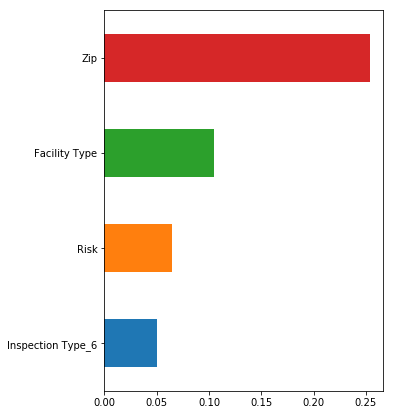

In [161]:
n = 4 #len(X_train.columns)
figsize = (5,7)
importances = pd.Series(best.feature_importances_, X_train.columns)
top_n = importances.sort_values()[-n:]

plt.figure(figsize=figsize)
top_n.plot.barh();

This graph shows that ZIP code i.e. location the most important feature in our model. Since it is correlated with income in the USA, it could indicate that restaurants in lower income areas have a higher chance of Failing, due either to an income disparity or perhaps a more intense enforcement policy towards lower income. 

Inspection type also indicates that we have some time traveling in our data as the type of inspection could indicate past violations.

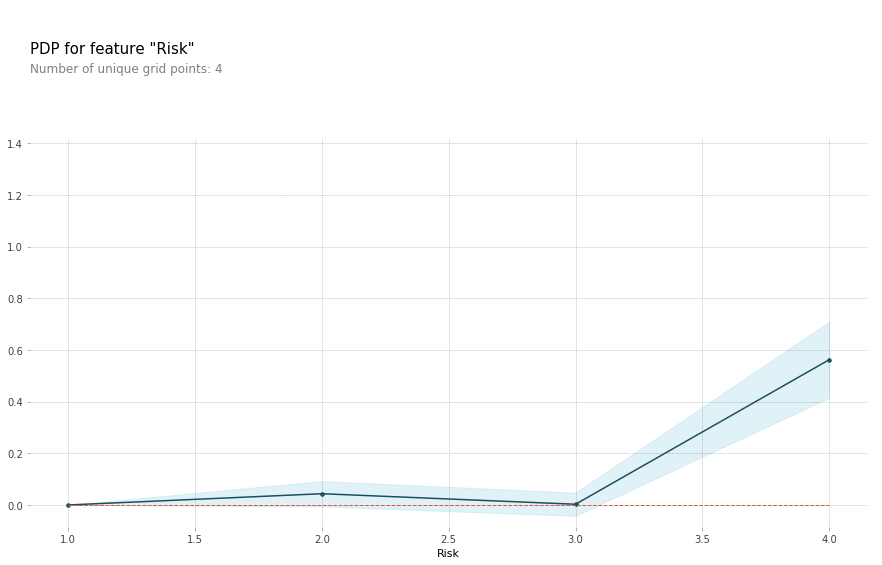

In [162]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Risk'

isolated = pdp_isolate(
    model=best,
    dataset=X_train,
    model_features=X_train.columns,
    feature = feature
)

pdp_plot(isolated, feature_name=feature);

This is interesting, after Risk factor 3, the amount of importance of risk in the Fail outcome increases significantly. This suggests that the risk scale might be biased towards the extreme end of values or that it is difficult to evaluate risk except for an obvious violation situation. 

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._

- What does Gradient Descent seek to minimize?

Gradient Descent seeks to minimize the cost function of a regression. Specifically in the case of a linear regression, the cost function is the Sum of Squared Errors between the line of best fit and the y-value observations. By minimizing the gradient of the SSE function, you've fitted the best possible line to our x,y observations.

- What is the "Learning Rate" and what is its function?

Learning Rate is the size of test correction on the test curve. A high learning rate will test values that are far from the first test value (to see if the gradient of this point is lower than the first point), where as a low learning rate will move towards a local minimum more slowly, taking shorter 'jumps.'

The tradeoff in learning rate is as follows: 

A high learning rate may 'miss' a local minimum by jumping along the cost function too much, whereas a a low learning rate may get stuck in a local minimum that is non-optimal (there is a lower minimum out of the range of it's learning rate) and take longer to compute. 